En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [2]:
# Cargo la imagen descargada desde el dataset de flores a colab
from google.colab import files

uploaded = files.upload()


Saving image_05085.jpg to image_05085.jpg


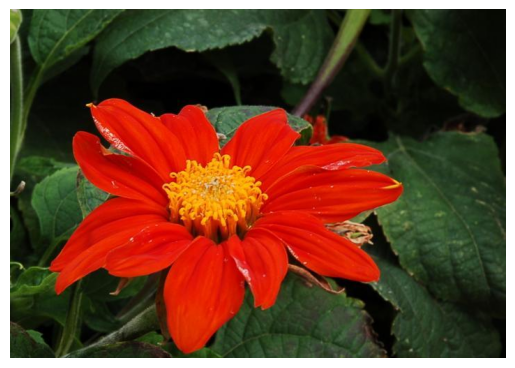

In [3]:
# Leo la imagen
image = cv2.imread("image_05085.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Conversión a RGB

# Muestro la imagen
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

In [4]:
# Pruebo aumentando solo el brillo, sin modificar hue y saturation
K = image.copy()  # Hacer una copia de la imagen original
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)  # Convertir a HSV    Hue (Tono), Saturation (Saturación) y Value (Valor)
Khsv[:, :, 2] = cv2.equalizeHist(Khsv[:, :, 2])  # Ecualizar el canal de brillo (V)
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGR

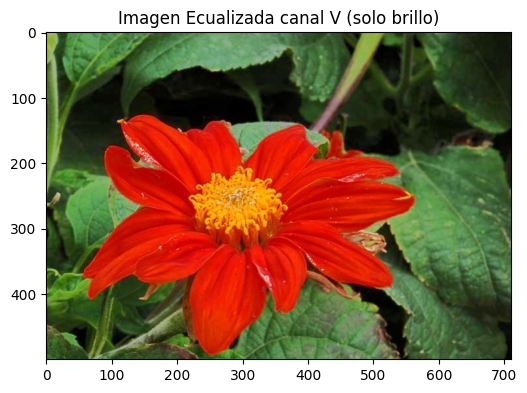

In [5]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada canal V (solo brillo)')  # Título
plt.show()  # Mostrar figura

In [6]:
# Pruebo modificando brillo y contraste con una función
def ajustar_brillo_contraste(imagen, alpha=1.2, beta=30):
    """
    Ajusta el contraste y brillo de la imagen.
    - alpha > 1 aumenta el contraste
    - beta > 0 aumenta el brillo
    """
    return cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)


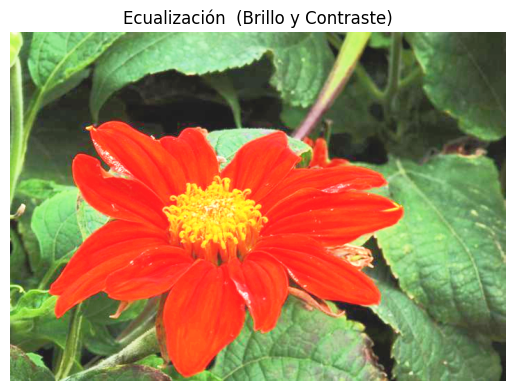

In [7]:
# Aument ligeramente el brillo y el contraste
K_final = ajustar_brillo_contraste(Knew, alpha=1.2, beta=30)

# Mostrar el resultado final
plt.imshow(cv2.cvtColor(K_final, cv2.COLOR_BGR2RGB))
plt.title("Ecualización  (Brillo y Contraste)")
plt.axis('off')
plt.show()


##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

In [8]:
# Convertir la imagen de BGR a HSV
hsv = cv2.cvtColor(K_final, cv2.COLOR_BGR2HSV)


In [10]:
# Defino el rango del color, rojo en este caso
# Rango bajo de rojo
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

# Rango alto de rojo
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])


In [11]:
# Crear dos máscaras para los dos rangos
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Unir ambas máscaras
mask = cv2.bitwise_or(mask1, mask2)


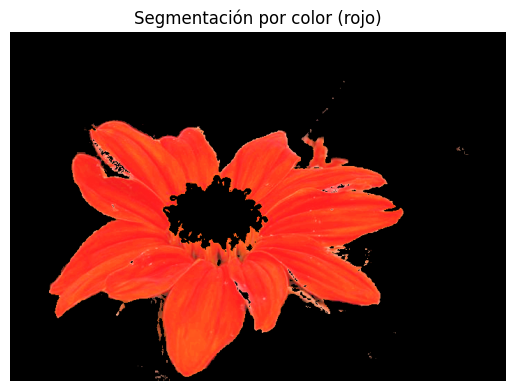

In [13]:
# Aplicar la máscara: mostrar solo lo que está dentro del rango
segmented = cv2.bitwise_and(K_final, K_final, mask=mask)

# Mostrar la imagen segmentada
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title("Segmentación por color (rojo)")
plt.axis('off')
plt.show()


##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

In [14]:
# Encontrar contornos en la máscara binaria
contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  #RETR_EXTERNAL encuentra solo los contornos externos.
                                                                                    # CHAIN_APPROX_SIMPLE optimiza la cantidad de puntos almacenados.


In [17]:
# Dibujar rectángulos y agregar texto
# Crear una copia de la imagen segmentada para dibujar encima
output = segmented.copy()

# Contador para objetos detectados válidos
objeto_id = 1

# Recorremos los contornos
for contorno in contornos:
    area = cv2.contourArea(contorno)

    if area < 100:  # Filtrar contornos muy pequeños (ruido)
        continue

    # Coordenadas del rectángulo
    x, y, w, h = cv2.boundingRect(contorno)

    # Dibujar el rectángulo en verde
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Texto del objeto
    texto = f"Objeto {objeto_id}"
    cv2.putText(output, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                0.6, (255, 255, 255), 2)

    # Incrementar el contador solo si el objeto es válido
    objeto_id += 1


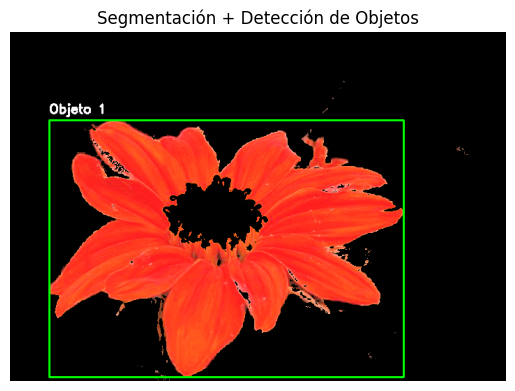

In [18]:
# Mostrar el resultado
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Segmentación + Detección de Objetos")
plt.axis('off')
plt.show()


##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución